# Human Activity Recognition


Dataset Link: https://sites.google.com/up.edu.mx/har-up/

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.4.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, LabelEncoder, MinMaxScaler

#### Map the data labels to values

In [3]:
# accdata.drop('Unnamed: 0', 1, inplace=True)
# accdata

In [4]:
# def generate_three_IMU(name):
#     x = name +'_x'
#     y = name +'_y'
#     z = name +'_z'
#     return [x,y,z]

# def generate_four_IMU(name):
#     x = name +'_x'
#     y = name +'_y'
#     z = name +'_z'
#     w = name +'_w'
#     return [x,y,z,w]

# def generate_cols_IMU(name):
#     # temp
#     temp = name+'_temperature'
#     output = [temp]
#     # acceleration 16
#     acceleration16 = name+'_3D_acceleration_16'
#     acceleration16 = generate_three_IMU(acceleration16)
#     output.extend(acceleration16)
#     # acceleration 6
#     acceleration6 = name+'_3D_acceleration_6'
#     acceleration6 = generate_three_IMU(acceleration6)
#     output.extend(acceleration6)
#     # gyroscope
#     gyroscope = name+'_3D_gyroscope'
#     gyroscope = generate_three_IMU(gyroscope)
#     output.extend(gyroscope)
#     # magnometer
#     magnometer = name+'_3D_magnetometer'
#     magnometer = generate_three_IMU(magnometer)
#     output.extend(magnometer)
#     # oreintation
#     oreintation = name+'_4D_orientation'
#     oreintation = generate_four_IMU(oreintation)
#     output.extend(oreintation)
#     return output

# def load_IMU():
#     output = ['time_stamp','activity_id', 'heart_rate']
#     hand = 'hand'
#     hand = generate_cols_IMU(hand)
#     output.extend(hand)
#     chest = 'chest'
#     chest = generate_cols_IMU(chest)
#     output.extend(chest)
#     ankle = 'ankle'
#     ankle = generate_cols_IMU(ankle)
#     output.extend(ankle)
#     return output
    
# def load_subjects(root='C:/Users/Gaurav/Downloads/new data/PAMAP2_Dataset/Optional/subject'):
#     output = pd.DataFrame()
#     cols = load_IMU()
    
#     for i in range(101,106):
#         path = root + str(i) +'.dat'
#         subject = pd.read_table(path, header=None, sep='\s+')
#         subject.columns = cols 
#         subject['id'] = i
#         output = output.append(subject, ignore_index=True)
#     output.reset_index(drop=True, inplace=True)
#     return output

# data = load_subjects()

In [5]:
# data

In [6]:
# def fix_data(data):
#     data = data.drop(data[data['activity_id']==0].index)
#     data = data.interpolate()
#     # fill all the NaN values in a coulmn with the mean values of the column
#     for colName in data.columns:
#         data[colName] = data[colName].fillna(data[colName].mean())
#     activity_mean = data.groupby(['activity_id']).mean().reset_index()
#     return data

# data = fix_data(data)

In [7]:
# data

In [8]:
# data.to_csv('ALLdat2.csv')

In [9]:
# accdata = data[['activity_id', 'hand_3D_acceleration_16_x', 'hand_3D_acceleration_16_y', 'hand_3D_acceleration_16_z', 'hand_3D_acceleration_6_x', 'hand_3D_acceleration_6_y', 'hand_3D_acceleration_6_z']]
# accdata

In [10]:
# accdata.to_csv('optoriaccdat.csv')

### Code to combine csv

In [11]:
# import os
# import glob
# import pandas as pd
# os.chdir("C:/Users/Gaurav/Downloads/Accelerometer")

In [12]:
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [13]:
# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "acc_act_sw_01-04-2021.csv", index=False, encoding='utf-8-sig')

In [14]:
# accdata.rename(columns={'hand_3D_acceleration_16_x': 'x', 'hand_3D_acceleration_16_y': 'y', 'hand_3D_acceleration_16_z': 'z'}, inplace=True)
# accdata

In [15]:
#  accdata.to_csv('PAMAP2accel16.csv')

In [16]:
import os
os.getcwd()

'C:\\Users\\Gaurav\\Downloads\\Accelerometer\\Testing_Folder'

In [17]:
#colnames=['time', 'x', 'y', 'z', 'xlin','ylin','zlin','gyrx','gyry','gyrz','magx','magy','magz', 'activity'] #for smartatwrist dataset
accdata=pd.read_csv('C:/Users/Gaurav/Downloads/Accelerometer/Testing_Folder/2021-04-28_all.csv') #names=colnames
accdata

,x,y,z,label
0,0.398438,0.281250,0.375000,Running
1,-0.789062,0.000000,-0.890625,Running
2,0.125000,0.820312,0.750000,Running
3,0.109375,-0.351562,-0.835938,Running
4,0.351562,0.843750,0.281250,Running
...,...,...,...,...
295895,0.796875,0.453125,0.703125,Running
295896,0.453125,-0.023438,0.195312,Running
295897,0.218750,-0.359375,0.656250,Running
295898,0.078125,-0.585938,-0.867188,Running


In [18]:
#accdata.rename(columns={'activity_id':'activity','hand_3D_acceleration_6_x':'x','hand_3D_acceleration_6_y':'y','hand_3D_acceleration_6_z':'z'}, inplace=True)
accdata.rename(columns={'label':'activity'}, inplace=True)
accdata

,x,y,z,activity
0,0.398438,0.281250,0.375000,Running
1,-0.789062,0.000000,-0.890625,Running
2,0.125000,0.820312,0.750000,Running
3,0.109375,-0.351562,-0.835938,Running
4,0.351562,0.843750,0.281250,Running
...,...,...,...,...
295895,0.796875,0.453125,0.703125,Running
295896,0.453125,-0.023438,0.195312,Running
295897,0.218750,-0.359375,0.656250,Running
295898,0.078125,-0.585938,-0.867188,Running


In [19]:
accdata=accdata[['activity','x','y','z']]
accdata

,activity,x,y,z
0,Running,0.398438,0.281250,0.375000
1,Running,-0.789062,0.000000,-0.890625
2,Running,0.125000,0.820312,0.750000
3,Running,0.109375,-0.351562,-0.835938
4,Running,0.351562,0.843750,0.281250
...,...,...,...,...
295895,Running,0.796875,0.453125,0.703125
295896,Running,0.453125,-0.023438,0.195312
295897,Running,0.218750,-0.359375,0.656250
295898,Running,0.078125,-0.585938,-0.867188


In [20]:
accdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295900 entries, 0 to 295899
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   activity  295900 non-null  object 
 1   x         295900 non-null  float64
 2   y         295900 non-null  float64
 3   z         295900 non-null  float64
dtypes: float64(3), object(1)
memory usage: 9.0+ MB


In [21]:
accdata.describe()

,x,y,z
count,295900.000000,295900.000000,295900.000000
mean,0.002838,0.122061,0.060465
std,0.467432,0.522410,0.622495
min,-1.000000,-1.000000,-1.000000
25%,-0.304688,-0.156250,-0.468750
50%,-0.132812,0.125000,0.085938
75%,0.406250,0.476562,0.640625
max,0.992188,0.992188,0.992188


In [22]:
print(accdata.isnull().sum())
accdata = accdata.dropna()
print(accdata.isnull().sum())

activity    0
x           0
y           0
z           0
dtype: int64
activity    0
x           0
y           0
z           0
dtype: int64


In [23]:
accdata['activity'].value_counts()

Sitting    129540
Walking    106640
Running     59720
Name: activity, dtype: int64

In [24]:
# map_ac = load_activity_map()
# accdata['activity'] = [map_ac[x] for x in accdata['activity']]

Wall time: 103 ms


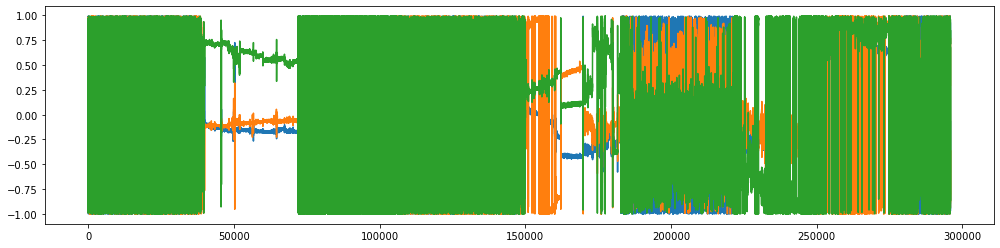

In [25]:
%%time
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 4))
plt.plot(accdata['x'])
plt.plot(accdata['y'])
plt.plot(accdata['z'])


## Label Encode Data

In [26]:
activities = accdata['activity'].value_counts().index

In [27]:
activities

Index(['Sitting', 'Walking', 'Running'], dtype='object')

In [28]:
count = min(accdata['activity'].value_counts())
print(count)

59720


In [29]:
df=accdata.groupby('activity').head(count).reset_index(drop=True)
print(df)

       activity         x         y         z
0       Running  0.398438  0.281250  0.375000
1       Running -0.789062  0.000000 -0.890625
2       Running  0.125000  0.820312  0.750000
3       Running  0.109375 -0.351562 -0.835938
4       Running  0.351562  0.843750  0.281250
...         ...       ...       ...       ...
179155  Running  0.796875  0.453125  0.703125
179156  Running  0.453125 -0.023438  0.195312
179157  Running  0.218750 -0.359375  0.656250
179158  Running  0.078125 -0.585938 -0.867188
179159  Running -0.070312 -0.929688  0.671875

[179160 rows x 4 columns]


In [30]:
# df=accdata

In [31]:
df['activity'].value_counts()

Running    59720
Sitting    59720
Walking    59720
Name: activity, dtype: int64

In [32]:
df.set_index('activity', inplace=True)

## Select Activities for training

In [33]:
df = df.loc[['Running', 'Sitting', 'Walking']]
# print(df)

In [34]:
labels=len(df.index.value_counts())
print(labels)

3


In [35]:
#pd.set_option('display.max_colwidth', 100)

label = LabelEncoder()

df['label'] = label.fit_transform(df.index)
df.head()

,x,y,z,label
activity,,,,
Running,0.398438,0.281250,0.375000,0
Running,-0.789062,0.000000,-0.890625,0
Running,0.125000,0.820312,0.750000,0
Running,0.109375,-0.351562,-0.835938,0
Running,0.351562,0.843750,0.281250,0


In [36]:
label.classes_

array(['Running', 'Sitting', 'Walking'], dtype=object)

## Standardized data 

In [37]:
# X = df[['x', 'y', 'z']]
# y = df['label']
# print(X, y)

In [38]:
# unscaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
# unscaled_X['label'] = y.values

In [39]:
# Standardize and normalize data from -1 to 1
# scaler1 = StandardScaler()
# X = scaler1.fit_transform(X)

# scaler2 = preprocessing.MinMaxScaler()
# X = scaler2.fit_transform(X)

# scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
# scaled_X['label'] = y.values
# scaled_X

## Balance Model Classes using Class Weights in Keras model

In [40]:
# unique, counts = np.unique(y, return_counts=True)
# dict(zip(unique, counts))

In [41]:
# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                 np.unique(y),
#                                                 y)

In [42]:
# class_weights = dict(enumerate(class_weights))
# print(class_weights)

## Frame Preparation 

In [43]:
import scipy.stats as stats

In [44]:
frame_size = 120
hop_size = frame_size*1 # Subsetting into frames (As per frequency)

In [45]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [46]:
X, y = get_frames(df, frame_size, hop_size)

In [47]:
X.shape, y.shape

((1492, 120, 3), (1492,))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42, stratify = y)

In [49]:
print(y_train, y_test)

[2 2 0 0 1 2 2 1 0 1 0 0 1 1 1 1 1 2 0 0 2 0 1 1 0 1 2 2 1 0 0 1 1 1 2 2 0
 1 1 2 0 0 1 2 1 2 0 1 0 2 0 1 0 0 1 2 0 2 1 0 0 2 0 2 2 2 2 1 0 2 1 0 1 1
 2 0 0 0 0 0 2 0 1 0 1 0 0 0 0 2 2 2 1 1 1 0 2 2 0 0 2 0 1 1 1 2 1 0 0 0 1
 0 0 0 0 1 2 1 1 1 1 0 1 1 2 2 1 0 2 1 1 0 2 1 2 1 2 0 1 0 1 1 2 1 0 1 1 1
 2 2 2 1 0 0 0 2 0 2 2 1 1 1 1 2 2 1 0 2 0 2 2 2 1 2 2 2 2 0 1 2 1 1 1 0 2
 0 2 0 0 0 2 1 0 0 0 1 0 2 1 2 1 1 2 2 0 1 1 0 2 1 2 2 1 0 1 2 2 0 0 1 1 2
 1 0 0 0 0 0 0 2 2 0 2 1 2 1 1 1 1 0 1 2 2 0 1 0 0 0 1 2 1 2 0 2 1 1 1 0 1
 1 0 2 0 0 2 2 2 1 1 0 2 1 2 2 2 0 0 0 1 2 1 0 1 1 0 2 2 0 1 2 0 2 1 2 0 0
 2 1 1 2 2 2 0 0 2 0 0 2 2 2 1 2 0 0 1 1 0 2 1 0 1 0 1 2 2 0 0 0 0 1 2 0 2
 2 0 0 0 2 2 1 0 2 1 2 0 2 2 1 2 0 1 1 2 2 1 1 1 1 1 1 2 1 0 2 0 2 2 0 0 0
 2 0 0 1 1 1 0 2 1 0 2 2 2 1 1 2 1 0 2 0 2 0 0 2 1 0 2 0 2 2 0 2 1 2 2 1 2
 2 0 1 1 2 2 1 0 1 1 1 1 1 2 0 1 0 0 0 0 1 2 2 2 2 0 0 1 0 0 0 0 1 2 2 2 2
 2 1 2 0 0 1 2 0 1 0 0 1 0 0 0 1 2 2 2 0 0 2 1 0 2 1 0 0 1 2 2 1 2 0 1 1 0
 1 0 1 0 2 2 0 1 1 1 2 0 

## Changing Y Train and Y test to one hot (categorical)

In [50]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=labels)
print(y_train)
y_test = to_categorical(y_test, num_classes=labels)
print(y_test)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


### Oversampling

In [51]:
# p=X_train.shape[1]
# q=X_train.shape[2]

In [52]:
# X_train = X_train.reshape(X_train.shape[0], -1)
# print(X_train.shape, y_train.shape)

In [53]:
# # define oversampling strategy
# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler()
# # fit and apply the transform
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [54]:
# from collections import Counter
# print(Counter(y_train))

In [55]:
# X_train = X_train.reshape(-1, p, q)

## Resize for Model input

In [56]:
X_train.shape, X_test.shape

((895, 120, 3), (597, 120, 3))

In [57]:
X_train[0].shape, X_test[0].shape

((120, 3), (120, 3))

In [58]:
a=X_train.shape
a = a + (1,)
b=X_test.shape
b = b + (1,)
print(a,b)

(895, 120, 3, 1) (597, 120, 3, 1)


In [59]:
X_train = X_train.reshape(a)
X_test = X_test.reshape(b)

In [60]:
X_train[0].shape, X_test[0].shape

((120, 3, 1), (120, 3, 1))

## 2D CNN Model 

In [61]:
from keras.regularizers import l2

model = tf.keras.Sequential()
model.add(Conv2D(32, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
#model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(32, (2, 2), activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(labels, activation='softmax'))

model.compile(optimizer=Adam(learning_rate = 0.0009), loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 119, 2, 32)        160       
_________________________________________________________________
dropout (Dropout)            (None, 119, 2, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 2, 32)        4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 119, 2, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 2, 32)        4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 119, 2, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7616)              0

In [62]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

epoch=20
history = model.fit(X_train, y_train, batch_size=64, callbacks=[callback], epochs = epoch, validation_data= (X_test, y_test), verbose=1)

#param shuffle = "TRUE"

Epoch 1/20
14/14 [==============================] - 3s 165ms/step - loss: 0.9144 - accuracy: 0.5326 - val_loss: 0.3275 - val_accuracy: 0.8978
Epoch 2/20
14/14 [==============================] - 1s 63ms/step - loss: 0.3637 - accuracy: 0.8892 - val_loss: 0.3358 - val_accuracy: 0.8827
Epoch 3/20
14/14 [==============================] - 1s 63ms/step - loss: 0.3288 - accuracy: 0.8975 - val_loss: 0.2597 - val_accuracy: 0.9028
Epoch 4/20
14/14 [==============================] - 1s 62ms/step - loss: 0.2006 - accuracy: 0.9315 - val_loss: 0.2145 - val_accuracy: 0.9280
Epoch 5/20
14/14 [==============================] - 1s 64ms/step - loss: 0.1917 - accuracy: 0.9265 - val_loss: 0.1863 - val_accuracy: 0.9481
Epoch 6/20
14/14 [==============================] - 1s 63ms/step - loss: 0.1517 - accuracy: 0.9547 - val_loss: 0.1817 - val_accuracy: 0.9296
Epoch 7/20
14/14 [==============================] - 1s 68ms/step - loss: 0.1199 - accuracy: 0.9695 - val_loss: 0.1647 - val_accuracy: 0.9447
Epoch 8/20
1

In [63]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

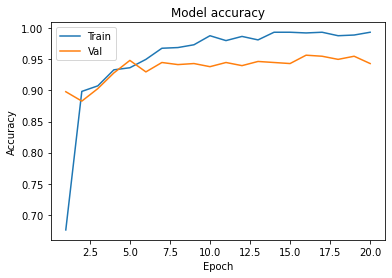

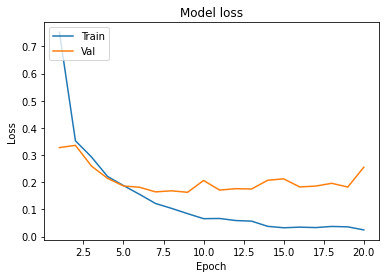

In [64]:
epoch=len(history.history['loss'])
plot_learningCurve(history, epoch)

In [65]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.9430


[0.2552911043167114, 0.9430485963821411]

# Confusion Matrix and F1-score

In [66]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [67]:
y_pred = model.predict_classes(X_test)
import collections
collections.Counter(y_pred)

C:\Users\Gaurav\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Counter({0: 214, 2: 189, 1: 194})

['Running' 'Sitting' 'Walking']


(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

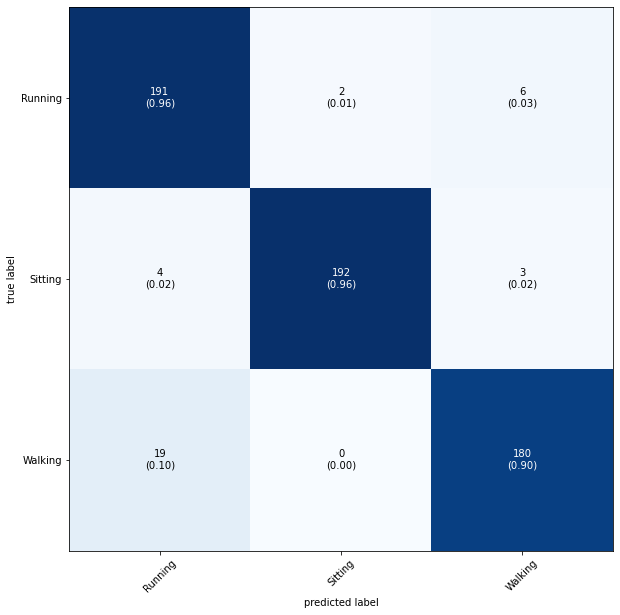

In [68]:
print(label.classes_)
y_test_round=np.argmax(y_test, axis=1)
#print(y_test_round)

mat = confusion_matrix(y_test_round, y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(10,10), class_names=label.classes_)

In [69]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(labels)]
print(classification_report(y_test_round, y_pred, target_names=label.classes_))

              precision    recall  f1-score   support

     Running       0.89      0.96      0.92       199
     Sitting       0.99      0.96      0.98       199
     Walking       0.95      0.90      0.93       199

    accuracy                           0.94       597
   macro avg       0.94      0.94      0.94       597
weighted avg       0.94      0.94      0.94       597





*   The traditional Accuracy is a good measure if you have quite balanced datasets and are interested in all types of outputs equally.

*   Precision is great to focus on if you want to minimize false positives. For example, you build a spam email classifier. You want to see as little spam as possible. But you do not want to miss any important, non-spam emails. In such cases, you may wish to aim for maximizing precision.

*  Recall is very important in domains such as medical (e.g., identifying cancer), where you really want to minimize the chance of missing positive cases (predicting false negatives). These are typically cases where missing a positive case has a much bigger cost than wrongly classifying something as positive.


*  F1-score combines precision and recall, and works also for cases where the datasets are imbalanced as it requires both precision and recall to have a reasonable value, as demonstrated by the experiments I showed in this post. Even if you have a small number of positive cases vs negative cases, the formula will weight the metric value down if the precision or recall of the positive class is low.

### Saving the Model

In [70]:
#model.save('activity_detectv8.model')
model.save('activity_detectv9.h5')

In [71]:
MODEL_DIR='tf_model'
version = "1"
export_path = os.path.join(MODEL_DIR, str(version))
#Save the model 
model.save(export_path, save_format="tf")
print('\nexport_path = {}'.format(export_path))
!dir {export_path}

INFO:tensorflow:Assets written to: tf_model\1\assets

export_path = tf_model\1
 Volume in drive C has no label.
 Volume Serial Number is 9C1F-17A8

 Directory of C:\Users\Gaurav\Downloads\Accelerometer\Testing_Folder\tf_model\1

28-04-2021  08.42 AM    <DIR>          .
28-04-2021  08.42 AM    <DIR>          ..
28-04-2021  08.42 AM    <DIR>          assets
28-04-2021  08.42 AM           191,953 saved_model.pb
28-04-2021  08.42 AM    <DIR>          variables
               1 File(s)        191,953 bytes
               4 Dir(s)  80,873,897,984 bytes free


In [72]:
# tf.saved_model.save(
#     model,
#     export_dir="tmp/saved-model",
#     signatures=None
#     )

### No need to run after this point

In [73]:
import pickle
pkl_filename = "fall_detect_v2.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

TypeError: cannot pickle 'weakref' object

In [ ]:
# Convert the model.
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()

# Save the model.
#with open('model.tflite', 'wb') as f:
#  f.write(tflite_model)

In [ ]:
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "Activity Detection"
model_meta.description = ("Activity Detection using only accelrometer data at 100Hz, 16g scale)
model_meta.version = "v3"
model_meta.author = "Gaurav Hazra"

### Keras Tuner



In [ ]:
pip install keras-tuner

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(100, 3, 1)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 16-512
  
  hp_units = hp.Int('units', min_value = 16, max_value = 512, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(keras.layers.Dense(64))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])

  return model

##model = tf.keras.Sequential()
#model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
#model.add(Dropout(0.1))

#model.add(Conv2D(32, (2, 2), activation='relu'))
#model.add(Dropout(0.2))

#model.add(Flatten())

#model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.4))

#model.add(Dense(labels+1, activation='softmax'))

In [ ]:
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(Conv2D(filters=hyperparam.Int('convolution_1',min_value=16, max_value=128, step=16), 
                   kernel_size=hyperparam.Choice('convolution_1', values = [2,6]), activation='relu',input_shape=X_train[0].shape)
  model.add(Conv2D(filters=hyperparam.Int('convolution_2', min_value=16, max_value=128, step=16), kernel_size = hyperparam.Choice('convolution_2', values = [2,6]), activation='relu'),
  model.add(Dropout(0.2))

  model.add(Flatten())

  model.add(Dense(64), activation = 'relu'))
  model.add(Dropout(0.4))

  model.add(Dense(labels+1, activation='softmax'))
  model.compile(optimizer=keras.optimizers.Adam(hyperparam.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                loss= keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                metrics=['accuracy'])
  return model

In [ ]:
import kerastuner as kt
from tensorflow import keras
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 20,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')

In [ ]:
tuner.search(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

In [ ]:
import IPython
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
tuner.get_best_hyperparameters()[0].values